## Mach Number Calculation

$C_sM_{T_e}$ = $-(1.1716+M_\parallel)n_e\frac{dT_e}{dr}$ <br><br>
$C_sM_{n_e}$ = $-0.1716T_e\frac{dn_e}{dr}$ <br><br>


In [17]:
import pandas as pd
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

e = 1.6e-19
m = 9.1e-31

In [18]:
data = pd.read_excel('C:/Users/GUNU/Dropbox/PRL/Python_Projects/IV_characteristic/Data summary_IHC_BF3.xlsx', sheet_name='Radial',header=0)
data = data.head(75)
del data['Condition']
data

,Position (mm),Vp (V),Vf (V),Teff (eV),Ne (m-3),Ne (cm-3)
0,-12.0,-0.0250,-46.20,6.39,8.150000e+17,8.150000e+11
1,-10.0,-0.1270,-50.00,6.33,1.270000e+18,1.270000e+12
2,-8.0,-0.1940,-51.90,5.83,1.630000e+18,1.630000e+12
3,-6.0,-0.1600,-48.40,5.92,1.800000e+18,1.800000e+12
4,-4.0,-0.0305,-52.10,6.32,1.790000e+18,1.790000e+12
...,...,...,...,...,...,...
70,14.0,4.3300,-12.60,1.58,4.340000e+17,4.340000e+11
71,16.0,4.3200,-7.32,1.38,3.650000e+17,3.650000e+11
72,18.0,4.3200,-5.22,1.36,3.090000e+17,3.090000e+11
73,20.0,4.2900,-3.15,1.33,2.080000e+17,2.080000e+11


In [19]:
ne_B_F = np.array(data[0:18]['Ne (m-3)'])
ne_BF2_F = np.array(data[19:37]['Ne (m-3)'])
ne_B_R = np.array(data[38:56]['Ne (m-3)'])
ne_BF2_R = np.array(data[57:75]['Ne (m-3)'])

Te_B_F = np.array(data[0:18]['Teff (eV)'])
Te_BF2_F = np.array(data[19:37]['Teff (eV)'])
Te_B_R = np.array(data[38:56]['Teff (eV)'])
Te_BF2_R = np.array(data[57:75]['Teff (eV)'])

position = np.array([-12,-10,-8,-6,-4,-2,0,2,4,6,8,10,12,14,16,18,20,23])/1000

In [20]:
x = np.arange(-12,23,0.1)/1000

In [60]:
ne_B_F_interpol = interpolate.CubicSpline(position, ne_B_F)
ne_B_F_interpol_deri = ne_B_F_interpol.derivative()
ne_BF2_F_interpol = interpolate.CubicSpline(position, ne_BF2_F)
ne_BF2_F_interpol_deri = ne_BF2_F_interpol.derivative()
ne_B_R_interpol = interpolate.CubicSpline(position, ne_B_R)
ne_B_R_interpol_deri = ne_B_R_interpol.derivative()
ne_BF2_R_interpol = interpolate.CubicSpline(position, ne_BF2_R)
ne_BF2_R_interpol_deri = ne_BF2_R_interpol.derivative()

Te_B_F_interpol = interpolate.CubicSpline(position, Te_B_F)
Te_B_F_interpol_deri = Te_B_F_interpol.derivative()
Te_B_F_smooth = savgol_filter(Te_B_F, 7, 3)
Te_BF2_F_interpol = interpolate.CubicSpline(position, Te_BF2_F)
Te_BF2_F_interpol_deri = Te_BF2_F_interpol.derivative()
Te_B_R_interpol = interpolate.CubicSpline(position, Te_B_R)
Te_B_R_interpol_deri = Te_B_R_interpol.derivative()
Te_BF2_R_interpol = interpolate.CubicSpline(position, Te_BF2_R)
Te_BF2_R_interpol_deri = Te_BF2_R_interpol.derivative()

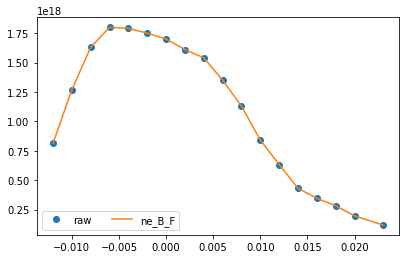

In [25]:
fig, ax = plt.subplots(figsize=(6.5, 4))
ax.plot(position, ne_B_F, 'o', label='raw')
ax.plot(position, ne_B_F_interpol(position),label="ne_B_F")
#ax.plot(position, ne_B_F_interpol(position), color='orange')
ax.legend(loc='lower left', ncol=2)
plt.show()

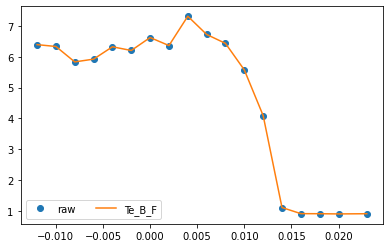

In [61]:
fig, ax = plt.subplots(figsize=(6.5, 4))
ax.plot(position, Te_B_F, 'o', label='raw')
ax.plot(position, Te_B_F_interpol(position),label="Te_B_F")
#ax.plot(position, ne_B_F_interpol(position), color='orange')
ax.legend(loc='lower left', ncol=2)
plt.show()

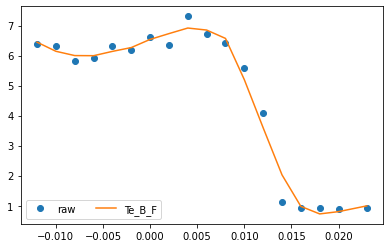

In [62]:
fig, ax = plt.subplots(figsize=(6.5, 4))
ax.plot(position, Te_B_F, 'o', label='raw')
ax.plot(position, Te_B_F_smooth,label="Te_B_F")
ax.legend(loc='lower left', ncol=2)
plt.show()

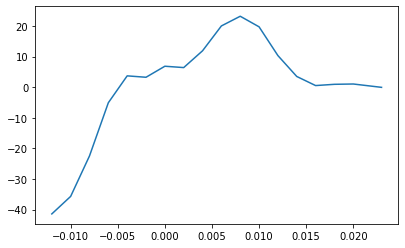

In [38]:
fig, ax = plt.subplots(figsize=(6.5, 4))
#M_B_F = -0.1716*Te_B_F_interpol(position)*ne_B_F_interpol_deri(position)*e
#M_B_F = -0.1716*5*ne_B_F_interpol_deri(position)*e
M_B_F = -0.1716*Te_B_F_smooth*ne_B_F_interpol_deri(position)*e
ax.plot(position, M_B_F)
plt.show()

In [45]:
print(Te_B_F_interpol(position))
print(Te_B_F_smooth)

[6.39  6.33  5.83  5.92  6.32  6.2   6.62  6.36  7.31  6.72  6.43  5.57
 4.09  1.11  0.912 0.909 0.903 0.909]
[6.44595238 6.14261905 5.9997619  5.99571429 6.13952381 6.26666667
 6.53857143 6.73142857 6.91714286 6.85       6.57190476 5.19790476
 3.59419048 2.02633333 0.97709524 0.72516667 0.80130952 0.99335714]


In [23]:
import numpy as np
x = np.linspace(0,2*np.pi,100)
y = np.sin(x) + np.random.random(100) * 0.2

from scipy.signal import savgol_filter
yhat = savgol_filter(y, 51, 3) # window size 51, polynomial order 3

In [49]:
interpolate.BSpline?

Init signature: interpolate.BSpline(t, c, k, extrapolate=True, axis=0)
Docstring:     
Univariate spline in the B-spline basis.

.. math::

    S(x) = \sum_{j=0}^{n-1} c_j  B_{j, k; t}(x)

where :math:`B_{j, k; t}` are B-spline basis functions of degree `k`
and knots `t`.

Parameters
----------
t : ndarray, shape (n+k+1,)
    knots
c : ndarray, shape (>=n, ...)
    spline coefficients
k : int
    B-spline order
extrapolate : bool or 'periodic', optional
    whether to extrapolate beyond the base interval, ``t[k] .. t[n]``,
    or to return nans.
    If True, extrapolates the first and last polynomial pieces of b-spline
    functions active on the base interval.
    If 'periodic', periodic extrapolation is used.
    Default is True.
axis : int, optional
    Interpolation axis. Default is zero.

Attributes
----------
t : ndarray
    knot vector
c : ndarray
    spline coefficients
k : int
    spline degree
extrapolate : bool
    If True, extrapolates the first and last polynomial pieces o